### Imports

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loads

#### load training times

In [21]:
f_training_times = open('results/cc18_training_times.json')
train_test_times = json.load(f_training_times)

#### load kappa ece results

In [20]:
f_kappa_ece = open("results/cc18_kappa_and_ece.json")
kappa_ece = json.load(f_kappa_ece)


#### A function to plot results

In [35]:
def plot_results_seperate_by_model(basis_df, suptitle_str = '', same_sub = False, ylim = []):
    colors = ['red','green','blue']
    means = {model_name : pd.DataFrame({dataset_num: {samp_size: np.mean(basis_df[model_name][dataset_num][samp_size]) 
                                                  for samp_size in basis_df[model_name][dataset_num].keys()}
                                    for dataset_num in basis_df[model_name].keys()}) for model_name in basis_df.keys()}
    if same_sub:
        fig, axs = plt.subplots()
        axs = [axs]
    else:
        fig, axs = plt.subplots(1, len(basis_df), figsize = (18,5), sharey = True, sharex = True)
    means_interpole = {}
    for count_plot_or, (model_name,df) in enumerate(means.items()):
        if same_sub:
            count_plot = 0
        else:
            count_plot = count_plot_or
            
        if not same_sub:
            color_chose = 'black'
        else:
            color_chose = colors[count_plot_or]
        
        df.index = df.index.astype(int)
        df.sort_index(inplace=True)
        interpolated =df.interpolate()
        if not same_sub:
            interpolated.plot(ax = axs[count_plot], alpha = 0.4, color = 'gray', legend =None)
            axs[count_plot].set_title(model_name)

        #axs[count_plot].set_legend('')
        if not same_sub: interpolated.mean(1).plot(ax = axs[count_plot], color = color_chose, label = model_name)
        
        if same_sub: axs[0].fill_between(interpolated.index, interpolated.quantile(0.1,1), interpolated.quantile(0.9,1), color = color_chose, alpha = 0.1)
        if same_sub: interpolated.median(1).plot(ax = axs[count_plot], color = color_chose, label = model_name)
        if same_sub: print(model_name)
        if same_sub: axs[0].legend()
        means_interpole[model_name] = (interpolated,interpolated.median(1) )
        axs[count_plot].set_xlabel('Sample Size')
        axs[count_plot].set_ylabel(suptitle_str)
        if len(ylim) > 0: axs[count_plot].set_ylim(ylim)
    fig.suptitle(suptitle_str, fontsize = 16, fontweight = 'bold')
    return means, means_interpole

### plot mean training times for the 3 methods

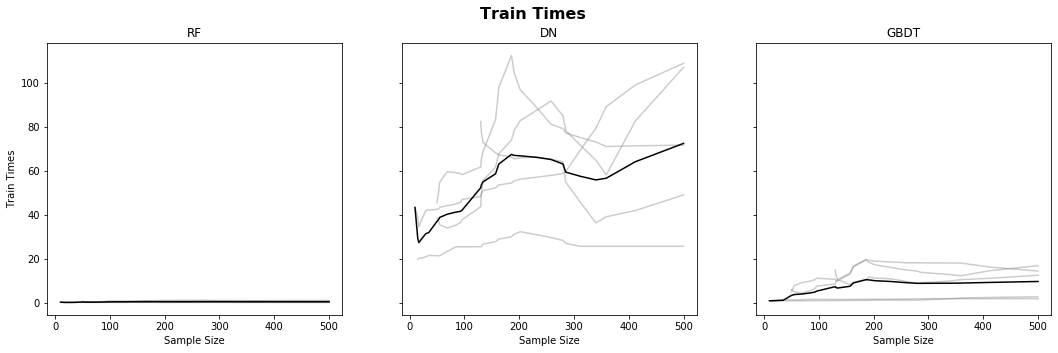

In [36]:
means_train_test, means_interpole_train_times = plot_results_seperate_by_model(train_test_times, 'Train Times')

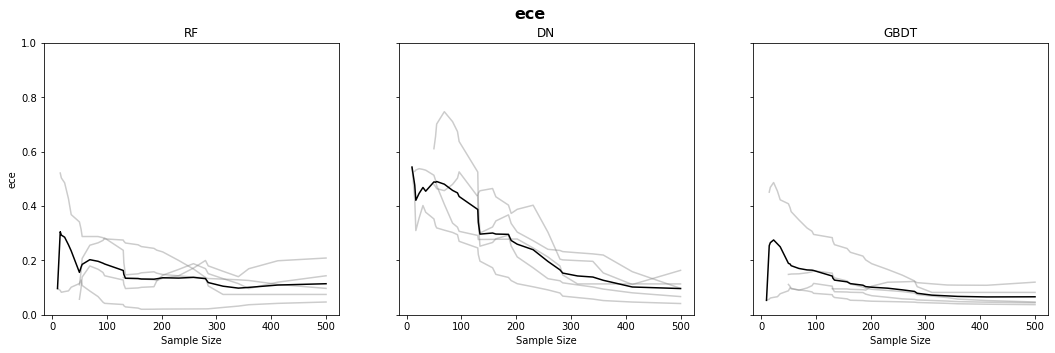

In [37]:
means_train_test, means_interpole_ece = plot_results_seperate_by_model(kappa_ece['ece'],suptitle_str = 'ece', same_sub = False, ylim = [0,1])

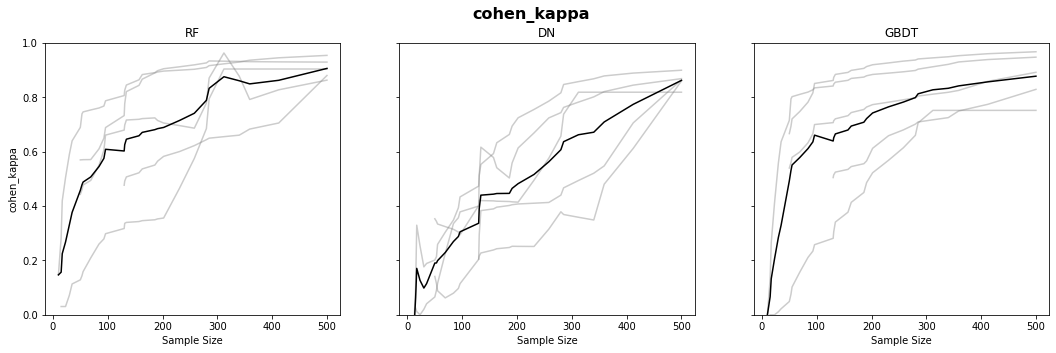

In [38]:
means_train_test, means_interpole_ece = plot_results_seperate_by_model(kappa_ece['cohen_kappa'],suptitle_str = 'cohen_kappa', same_sub = False, ylim = [0,1])

### On the same bar with 90% confidence interval

RF
DN
GBDT


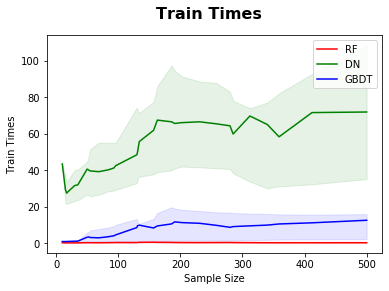

In [39]:
means_train_test = plot_results_seperate_by_model(train_test_times, 'Train Times',True)

RF
DN
GBDT


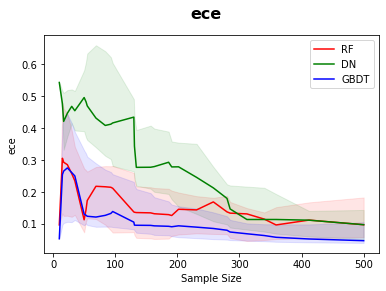

In [40]:
means_train_test = plot_results_seperate_by_model(kappa_ece['ece'], 'ece',True)

RF
DN
GBDT


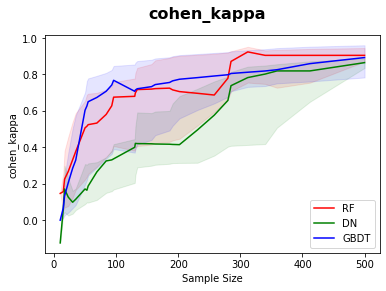

In [41]:
means_train_test = plot_results_seperate_by_model(kappa_ece['cohen_kappa'], 'cohen_kappa',True)